In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

In [295]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

1) Read the data (2022)
2) 

The following function scans weekly data files and combines them in one data frame. It takes ```year``` as the input.

In [2]:
def raw_df_generator(year):
    file_list = os.listdir(r'mta_data/%s'%str(year))
    df = pd.read_csv(r'mta_data/%s/%s'%(str(year), file_list[0]))

    for i in range (1,len(file_list)):
        df = pd.concat([df, pd.read_csv(r'mta_data/%s/%s'%(str(year), file_list[i]))], axis = 0)

    return df

In [3]:
raw_df_2022 = raw_df_generator(2022)

In [4]:
raw_df_2022.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,03:00:00,REGULAR,7689903,2671580
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,07:00:00,REGULAR,7689908,2671583
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,11:00:00,REGULAR,7689924,2671637
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2022,15:00:00,REGULAR,7689970,2671692


In [134]:
raw_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739787 entries, 0 to 211706
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [5]:
df = raw_df_2022.copy()

Let us create a new column that uniquely identifies the turnstile. In order to that, I will use a combination of *C/A*, *UNIT*, and *SCP*.

In [6]:
df['Turnstile'] = df['C/A'] + "-" + df['UNIT'] + "-" + df['SCP']

An another column will be the DateTime row which will be used to sort the dataframe. Besides, day of the week and month will be added as extra information for micro-analysis.

In [7]:
#df['DateTime'] = df['DATE'] + " " + df['TIME']
df['Date'] = pd.to_datetime(df['DATE'], format = '%m/%d/%Y') # format of the str input that is going to be converted to DT
df['Time'] = pd.to_datetime(df['TIME'], format = '%H:%M:%S').dt.time

df.drop(columns=['DATE', 'TIME', 'C/A', 'UNIT', 'SCP', 'LINENAME', 'DIVISION'],inplace=True)

In [8]:
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

In [9]:
df.head()

,STATION,DESC,ENTRIES,EXITS,Turnstile,Date,Time,Day,Month
0,59 ST,REGULAR,7689737,2671257,A002-R051-02-00-00,2022-02-26,03:00:00,Saturday,February
1,59 ST,REGULAR,7689741,2671278,A002-R051-02-00-00,2022-02-26,07:00:00,Saturday,February
2,59 ST,REGULAR,7689758,2671380,A002-R051-02-00-00,2022-02-26,11:00:00,Saturday,February
3,59 ST,REGULAR,7689791,2671465,A002-R051-02-00-00,2022-02-26,15:00:00,Saturday,February
4,59 ST,REGULAR,7689858,2671530,A002-R051-02-00-00,2022-02-26,19:00:00,Saturday,February


In [10]:
df_sorted = df.sort_values(['Turnstile', 'Date', 'Time'])
df_sorted = df_sorted.reset_index(drop = True)

In [11]:
df_sorted["Entry"] = df_sorted.groupby('Turnstile')["ENTRIES"].diff()
df_sorted["Exit"] = df_sorted.groupby('Turnstile')["EXITS                                                               "].diff()

In [129]:
df_sorted.head(50)

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description
1,A002-R051-02-00-00,59 ST,2022-02-26,07:00:00,February,Saturday,4.0,21.0,REGULAR
2,A002-R051-02-00-00,59 ST,2022-02-26,11:00:00,February,Saturday,17.0,102.0,REGULAR
3,A002-R051-02-00-00,59 ST,2022-02-26,15:00:00,February,Saturday,33.0,85.0,REGULAR
4,A002-R051-02-00-00,59 ST,2022-02-26,19:00:00,February,Saturday,67.0,65.0,REGULAR
5,A002-R051-02-00-00,59 ST,2022-02-26,23:00:00,February,Saturday,32.0,38.0,REGULAR
6,A002-R051-02-00-00,59 ST,2022-02-27,03:00:00,February,Sunday,13.0,12.0,REGULAR
7,A002-R051-02-00-00,59 ST,2022-02-27,07:00:00,February,Sunday,5.0,3.0,REGULAR
8,A002-R051-02-00-00,59 ST,2022-02-27,11:00:00,February,Sunday,16.0,54.0,REGULAR
9,A002-R051-02-00-00,59 ST,2022-02-27,15:00:00,February,Sunday,46.0,55.0,REGULAR
10,A002-R051-02-00-00,59 ST,2022-02-27,19:00:00,February,Sunday,40.0,50.0,REGULAR


In [13]:
df_sorted.drop(columns=['ENTRIES', "EXITS                                                               "], inplace=True)

In [14]:
df_sorted.head()

,STATION,DESC,Turnstile,Date,Time,Day,Month,Entry,Exit
0,59 ST,REGULAR,A002-R051-02-00-00,2022-02-26,03:00:00,Saturday,February,NaN,NaN
1,59 ST,REGULAR,A002-R051-02-00-00,2022-02-26,07:00:00,Saturday,February,4.0,21.0
2,59 ST,REGULAR,A002-R051-02-00-00,2022-02-26,11:00:00,Saturday,February,17.0,102.0
3,59 ST,REGULAR,A002-R051-02-00-00,2022-02-26,15:00:00,Saturday,February,33.0,85.0
4,59 ST,REGULAR,A002-R051-02-00-00,2022-02-26,19:00:00,Saturday,February,67.0,65.0


In [15]:
df_sorted.rename(columns={'STATION':'Station', 'DESC': 'Description'},inplace=True)

In [124]:
df_sorted.head(15)

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description
1,A002-R051-02-00-00,59 ST,2022-02-26,07:00:00,February,Saturday,4.0,21.0,REGULAR
2,A002-R051-02-00-00,59 ST,2022-02-26,11:00:00,February,Saturday,17.0,102.0,REGULAR
3,A002-R051-02-00-00,59 ST,2022-02-26,15:00:00,February,Saturday,33.0,85.0,REGULAR
4,A002-R051-02-00-00,59 ST,2022-02-26,19:00:00,February,Saturday,67.0,65.0,REGULAR
5,A002-R051-02-00-00,59 ST,2022-02-26,23:00:00,February,Saturday,32.0,38.0,REGULAR
6,A002-R051-02-00-00,59 ST,2022-02-27,03:00:00,February,Sunday,13.0,12.0,REGULAR
7,A002-R051-02-00-00,59 ST,2022-02-27,07:00:00,February,Sunday,5.0,3.0,REGULAR
8,A002-R051-02-00-00,59 ST,2022-02-27,11:00:00,February,Sunday,16.0,54.0,REGULAR
9,A002-R051-02-00-00,59 ST,2022-02-27,15:00:00,February,Sunday,46.0,55.0,REGULAR
10,A002-R051-02-00-00,59 ST,2022-02-27,19:00:00,February,Sunday,40.0,50.0,REGULAR


In [17]:
df_sorted = df_sorted[['Turnstile', 'Station','Date', 'Time','Month','Day','Entry','Exit','Description' ]]

In [18]:
df_sorted.head()

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description
0,A002-R051-02-00-00,59 ST,2022-02-26,03:00:00,February,Saturday,NaN,NaN,REGULAR
1,A002-R051-02-00-00,59 ST,2022-02-26,07:00:00,February,Saturday,4.0,21.0,REGULAR
2,A002-R051-02-00-00,59 ST,2022-02-26,11:00:00,February,Saturday,17.0,102.0,REGULAR
3,A002-R051-02-00-00,59 ST,2022-02-26,15:00:00,February,Saturday,33.0,85.0,REGULAR
4,A002-R051-02-00-00,59 ST,2022-02-26,19:00:00,February,Saturday,67.0,65.0,REGULAR


In [19]:
df_sorted.dropna(subset=['Entry', 'Exit'],inplace=True)

In [20]:
stations = pd.read_excel('mta_data/station_borough.xlsx')

In [21]:
extended_df = df_sorted.merge(stations,left_on='Station',right_on= 'Station', how='left')

In [22]:
extended_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734738 entries, 0 to 2734737
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Turnstile    object        
 1   Station      object        
 2   Date         datetime64[ns]
 3   Time         object        
 4   Month        object        
 5   Day          object        
 6   Entry        float64       
 7   Exit         float64       
 8   Description  object        
 9   Borough      object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 229.5+ MB


In [23]:
extended_df.head()

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description,Borough
0,A002-R051-02-00-00,59 ST,2022-02-26,07:00:00,February,Saturday,4.0,21.0,REGULAR,Brooklyn
1,A002-R051-02-00-00,59 ST,2022-02-26,11:00:00,February,Saturday,17.0,102.0,REGULAR,Brooklyn
2,A002-R051-02-00-00,59 ST,2022-02-26,15:00:00,February,Saturday,33.0,85.0,REGULAR,Brooklyn
3,A002-R051-02-00-00,59 ST,2022-02-26,19:00:00,February,Saturday,67.0,65.0,REGULAR,Brooklyn
4,A002-R051-02-00-00,59 ST,2022-02-26,23:00:00,February,Saturday,32.0,38.0,REGULAR,Brooklyn


In [ ]:
extended_df['Entry'].describe()

In [ ]:
extended_df['Exit'].describe()

array([<AxesSubplot: title={'center': 'Entry'}, xlabel='Borough'>,
       <AxesSubplot: title={'center': 'Exit'}, xlabel='Borough'>],
      dtype=object)

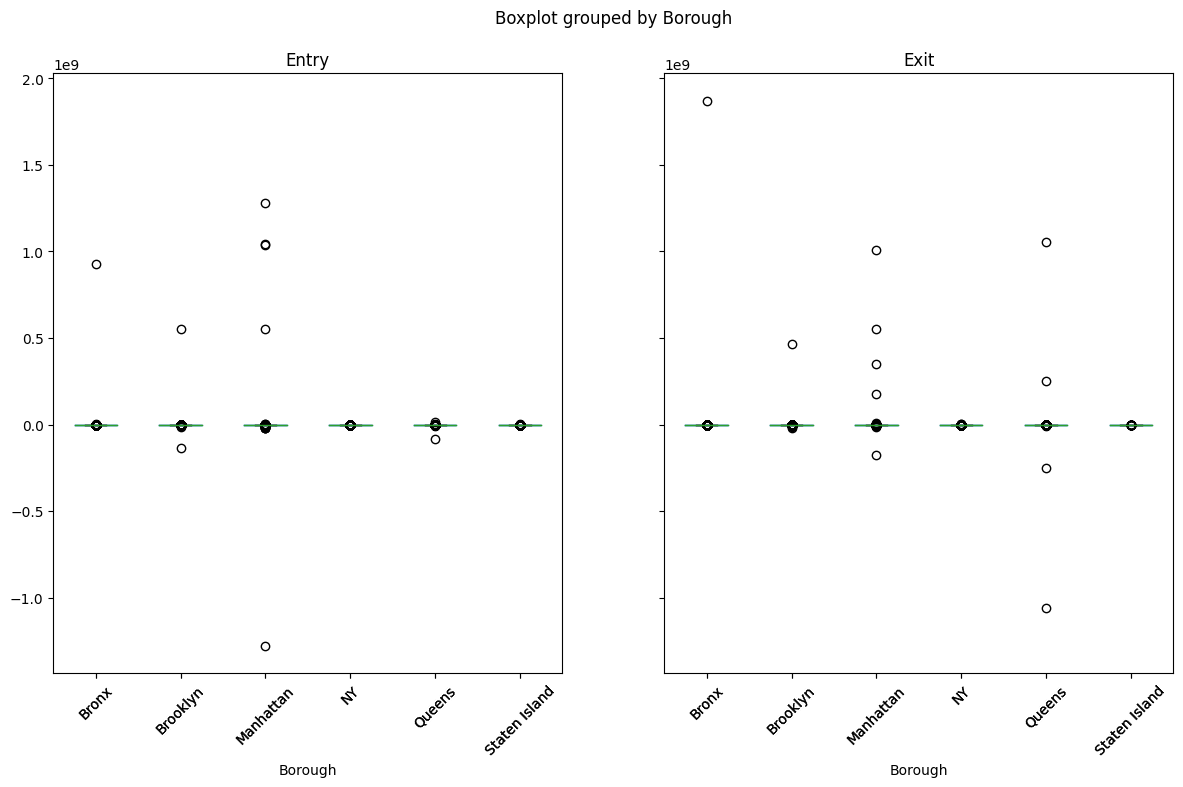

In [24]:
extended_df.boxplot(by= 'Borough', column =['Entry','Exit'], grid = False, figsize=(14,8), rot=45)

array([[<AxesSubplot: title={'center': 'Entry'}>]], dtype=object)

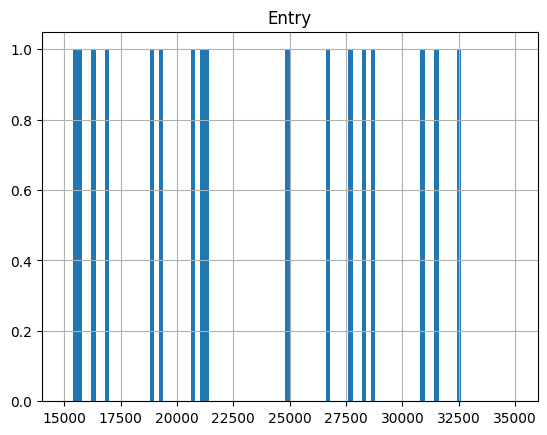

In [132]:
extended_df.hist('Entry', bins = 100, range=[15000, 35000])

array([[<AxesSubplot: title={'center': 'Exit'}>]], dtype=object)

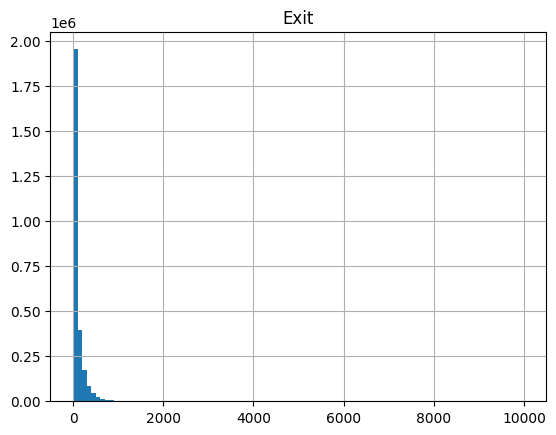

In [41]:
extended_df.hist('Exit', bins = 100, range=[0, 10000])

In [43]:
df2 = extended_df.copy()

In [44]:
df2['Entry'][df2['Entry'] < 0] = pd.NA #or np.NaN
df2['Entry'][df2['Entry'] > 15000] = pd.NA 

df2['Exit'][df2['Exit'] < 0] = pd.NA 
df2['Exit'][df2['Exit'] > 15000] = pd.NA 



C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\3565491514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Entry'][df2['Entry'] < 0] = pd.NA #or np.NaN
C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\3565491514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Entry'][df2['Entry'] > 15000] = pd.NA
C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\3565491514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ex

In [45]:
df2.describe()

,Entry,Exit
count,2.707211e+06,2.718289e+06
mean,7.047409e+01,9.103480e+01
std,1.040117e+02,1.452826e+02
min,0.000000e+00,0.000000e+00
25%,4.000000e+00,7.000000e+00
50%,2.900000e+01,3.700000e+01
75%,9.600000e+01,1.140000e+02
max,1.448300e+04,1.490600e+04


In [46]:
df2['Entry'].isnull().sum()
#df2['Exit'].isnull().sum()

27527

In [50]:
#Drop NA and create column "Total"
df2.dropna(subset=['Entry', 'Exit'],inplace=True)

df2['Total'] = df2['Entry'] + df2['Exit']

In [64]:
df2.describe()

,Entry,Exit,Total
count,2.701513e+06,2.701513e+06,2.701513e+06
mean,7.046959e+01,9.092514e+01,1.613947e+02
std,1.031636e+02,1.439137e+02,2.043423e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,7.000000e+00,1.700000e+01
50%,2.900000e+01,3.700000e+01,8.800000e+01
75%,9.600000e+01,1.140000e+02,2.320000e+02
max,1.448300e+04,1.254100e+04,2.702400e+04


In [65]:
df2['Entry'].isnull().sum()

0

array([[<AxesSubplot: title={'center': 'Entry'}>]], dtype=object)

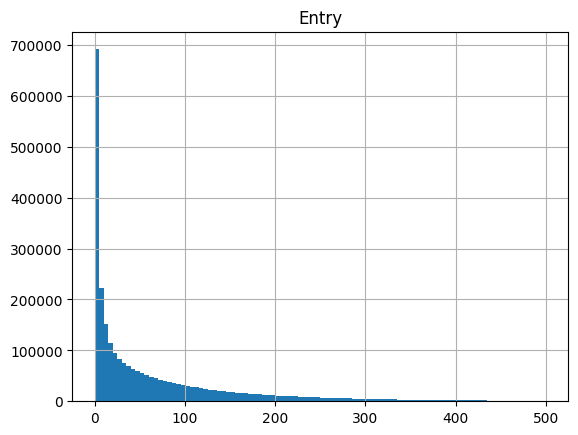

In [51]:
df2.hist('Entry',bins=100, range=[0,500])

array([[<AxesSubplot: title={'center': 'Exit'}>]], dtype=object)

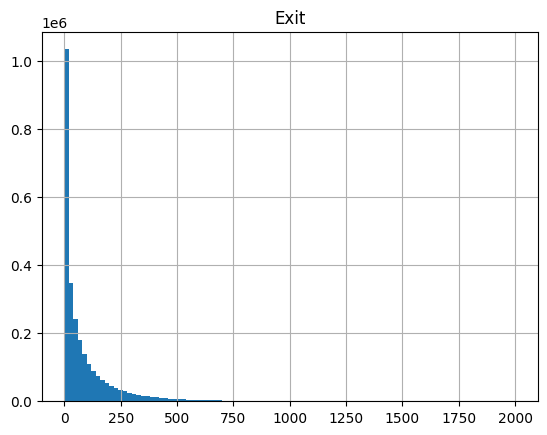

In [52]:
df2.hist('Exit',bins=100, range=[0,2000])

In [53]:
df2['Entry'].describe()

count    2.701513e+06
mean     7.046959e+01
std      1.031636e+02
min      0.000000e+00
25%      4.000000e+00
50%      2.900000e+01
75%      9.600000e+01
max      1.448300e+04
Name: Entry, dtype: float64

In [ ]:
""" 
def detect_outliers(df):
    q1= df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1

    ub = q3 + 1.5*iqr    
    lb = q1 - 1.5*iqr

    if lb < 0:
        lb = 0

    print(f'Outlier Bounds: {lb} --- {ub}')
    return lb, ub

def remove_outliers(df, col):
    
    lb,ub = detect_outliers(df[col])    

    norm_df = df[( (df[col]>lb) & (df[col]<ub) )]

    return norm_df


norm_entry = remove_outliers(df2, 'Entry')
norm_exit = remove_outliers(norm_entry, 'Exit')
norm_exit['Total'] = norm_exit['Entry'] + norm_exit['Exit']

norm_exit.boxplot(by= 'Borough', column =['Entry','Exit'], grid = False, figsize=(14,8))
norm_exit.hist('Exit')
norm_exit['Total'] = norm_exit['Entry'] + norm_exit['Exit']
"""

In [310]:
selected_boroughs = pd.DataFrame(df2.groupby("Borough")["Total"].sum().sort_values(ascending=False)).head(10)

<AxesSubplot: xlabel='Borough', ylabel='Total Traffic'>

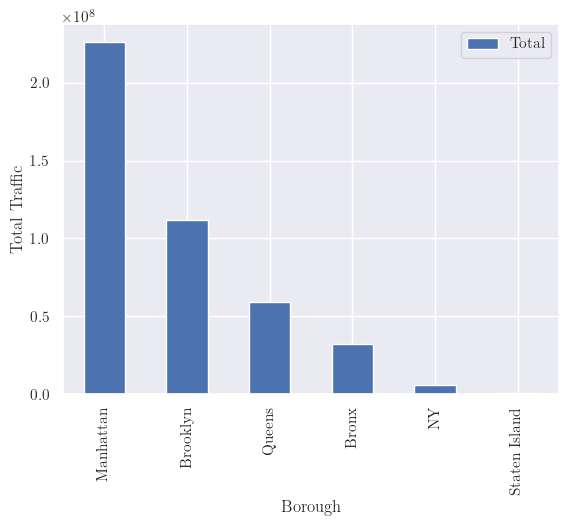

In [313]:
selected_boroughs.plot(kind = 'bar', ylabel='Total Traffic')

In [66]:
selected_stations = pd.DataFrame(df2.groupby("Station")["Total"].sum().sort_values(ascending=False)).head(10)

In [67]:
selected_stations.head(10)

,Total
Station,
34 ST-PENN STA,11623768.0
GRD CNTRL-42 ST,9372030.0
34 ST-HERALD SQ,8492165.0
14 ST-UNION SQ,7641579.0
86 ST,7591230.0
23 ST,7429379.0
TIMES SQ-42 ST,7213343.0
42 ST-PORT AUTH,6849311.0
FULTON ST,6497595.0


Text(0.5, 1.0, 'Total Entries by TOP10 Station ')

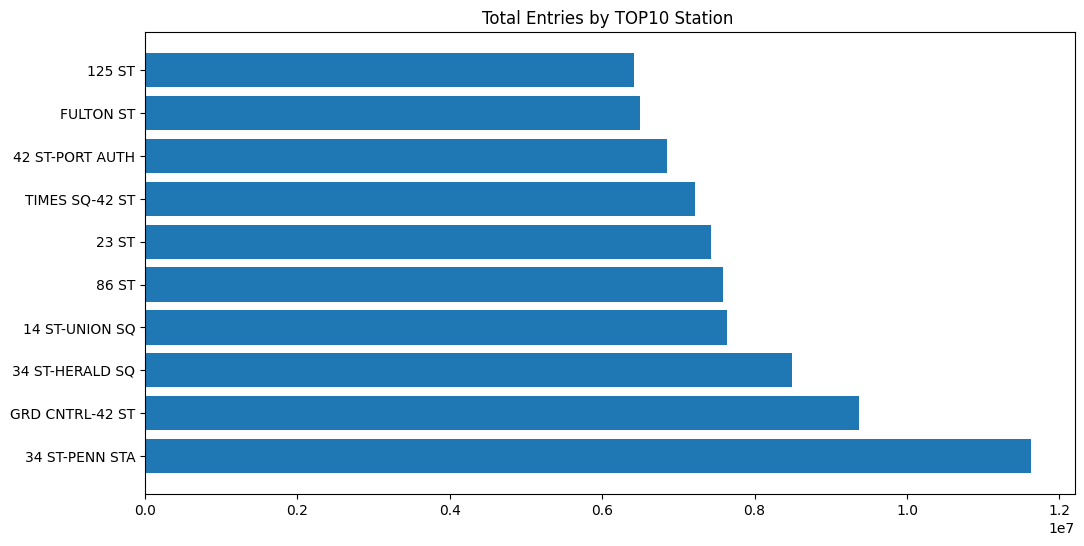

In [72]:
plt.figure(figsize=[12,6])
plt.barh(selected_stations.index, selected_stations['Total'], data=selected_stations)
plt.xticks()
plt.title("Total Entries by TOP10 Station ")

In [70]:
selected_stations_av = pd.DataFrame(df2.groupby("Station")["Total"].mean().sort_values(ascending=False)).head(10)

In [71]:
selected_stations_av.head(10)

,Total
Station,
YORK ST,500.338235
103 ST-CORONA,436.989360
191 ST,404.517956
JUNCTION BLVD,376.748327
82 ST-JACKSON H,371.080156
JKSN HT-ROOSVLT,371.076917
MYRTLE AV,364.124204
NEWKIRK PLAZA,356.157354
FLUSHING-MAIN,355.856158


In [60]:
#len(df2[df2['Station'] == 'YORK ST'])

1632

In [61]:
#len(df2[df2['Station'] == '34 ST-PENN STA'])

54915

In [62]:
df2[df2['Station'] == '34 ST-PENN STA'].describe()
# it may not be a good idea to remove outlier for most-crowded stations. 

,Entry,Exit,Total
count,54915.000000,54915.000000,54915.000000
mean,82.735792,128.932569,211.668360
std,111.957745,194.394494,243.382034
min,0.000000,0.000000,0.000000
25%,9.000000,17.000000,31.000000
50%,46.000000,64.000000,142.000000
75%,115.000000,164.000000,311.000000
max,7557.000000,2249.000000,9636.000000


In [63]:
df2[df2['Station'] == 'PARKSIDE AV'].describe()

,Entry,Exit,Total
count,1635.000000,1635.000000,1635.000000
mean,139.918654,166.990826,306.909480
std,107.374247,140.837074,176.610711
min,1.000000,4.000000,13.000000
25%,42.000000,67.000000,146.500000
50%,134.000000,124.000000,334.000000
75%,209.000000,222.000000,427.000000
max,487.000000,774.000000,863.000000


In [77]:
df2[df2['Total'] > 15000]

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description,Borough,Total
1552826,PTH03-R552-00-01-08,JOURNAL SQUARE,2022-05-17,08:34:25,May,Tuesday,14483.0,12541.0,REGULAR,Manhattan,27024.0


In [78]:
final_df = df2[df2['Description']=='REGULAR']

In [79]:
final_df.describe()

,Entry,Exit,Total
count,2.689450e+06,2.689450e+06,2.689450e+06
mean,7.053261e+01,9.099975e+01,1.615324e+02
std,1.031268e+02,1.439209e+02,2.043209e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,7.000000e+00,1.700000e+01
50%,2.900000e+01,3.700000e+01,8.800000e+01
75%,9.600000e+01,1.140000e+02,2.320000e+02
max,1.448300e+04,1.254100e+04,2.702400e+04


In [143]:
selected_stations = pd.DataFrame(final_df.groupby("Station")["Total"].sum().sort_values(ascending=False)).head(10)

In [144]:
selected_stations

,Total
Station,
34 ST-PENN STA,11567395.0
GRD CNTRL-42 ST,9350175.0
34 ST-HERALD SQ,8453827.0
14 ST-UNION SQ,7607448.0
86 ST,7585159.0
23 ST,7419197.0
TIMES SQ-42 ST,7177113.0
42 ST-PORT AUTH,6833681.0
125 ST,6411395.0


Text(0.5, 1.0, 'Total Entries by TOP10 Station ')

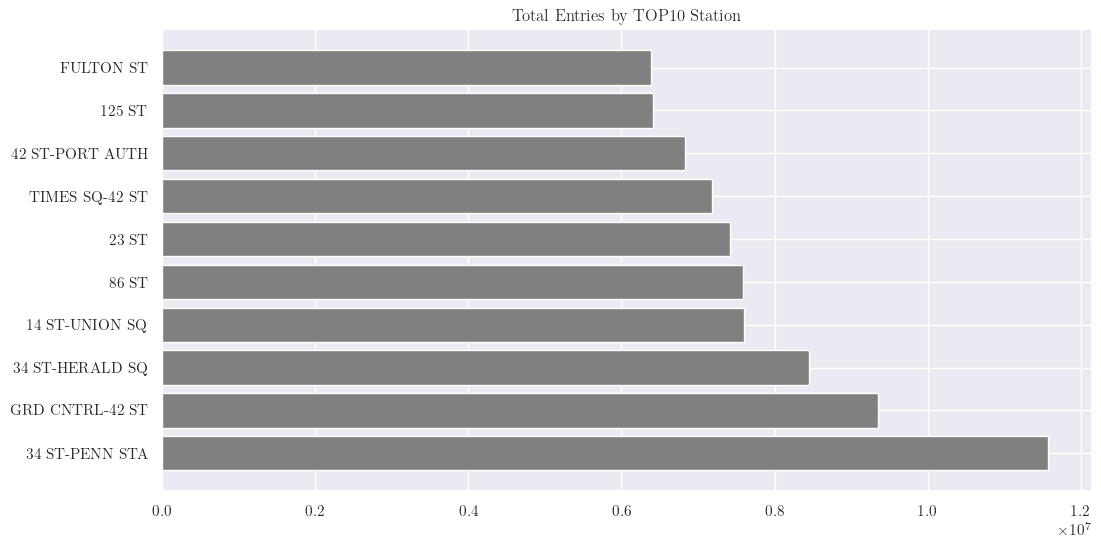

In [301]:
plt.figure(figsize=[12,6])
plt.barh(selected_stations.index, selected_stations['Total'], data=selected_stations, color = 'grey' )
plt.xticks()
plt.title("Total Entries by TOP10 Station ")

In [178]:
top10_station = final_df.groupby("Station")["Total"].sum().sort_values(ascending=False).head(10)

In [183]:
top10_list = top10_station.index

In [187]:
small_final_df = final_df[final_df['Station'].isin(top10_list)]

In [190]:
small_final_df.head(10)

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description,Borough,Total,DateTime
38709,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-26,07:00:00,February,Saturday,15.0,43.0,REGULAR,Manhattan,58.0,2022-02-26 07:00:00
38710,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-26,11:00:00,February,Saturday,72.0,357.0,REGULAR,Manhattan,429.0,2022-02-26 11:00:00
38711,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-26,15:00:00,February,Saturday,111.0,542.0,REGULAR,Manhattan,653.0,2022-02-26 15:00:00
38712,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-26,19:00:00,February,Saturday,205.0,538.0,REGULAR,Manhattan,743.0,2022-02-26 19:00:00
38713,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-26,23:00:00,February,Saturday,134.0,243.0,REGULAR,Manhattan,377.0,2022-02-26 23:00:00
38714,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-27,03:00:00,February,Sunday,37.0,59.0,REGULAR,Manhattan,96.0,2022-02-27 03:00:00
38715,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-27,07:00:00,February,Sunday,11.0,30.0,REGULAR,Manhattan,41.0,2022-02-27 07:00:00
38716,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-27,11:00:00,February,Sunday,43.0,208.0,REGULAR,Manhattan,251.0,2022-02-27 11:00:00
38717,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-27,15:00:00,February,Sunday,78.0,361.0,REGULAR,Manhattan,439.0,2022-02-27 15:00:00
38718,A021-R032-01-00-00,TIMES SQ-42 ST,2022-02-27,19:00:00,February,Sunday,109.0,343.0,REGULAR,Manhattan,452.0,2022-02-27 19:00:00


In [235]:
#small_final_df.to_excel("top10_data.xlsx")

In [271]:
res = small_final_df.groupby('Station').resample("4H", on = 'DateTime').sum()

C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\241927577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = small_final_df.groupby('Station').resample("4H", on = 'DateTime').sum()
C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\241927577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = small_final_df.groupby('Station').resample("4H", on = 'DateTime').sum()
C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\241927577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_on

In [272]:
res

Entry     Exit    Total
Station        DateTime                                     
125 ST         2022-02-26 04:00:00   674.0   1402.0   2076.0
               2022-02-26 08:00:00  2421.0   3767.0   6188.0
               2022-02-26 12:00:00  4468.0   6612.0  11080.0
               2022-02-26 16:00:00  5622.0   8226.0  13848.0
               2022-02-26 20:00:00  4023.0   6725.0  10748.0
...                                    ...      ...      ...
TIMES SQ-42 ST 2022-05-27 04:00:00  1217.0    942.0   2159.0
               2022-05-27 08:00:00  2109.0   4658.0   6767.0
               2022-05-27 12:00:00  5189.0  12439.0  17628.0
               2022-05-27 16:00:00  7882.0  12740.0  20622.0
               2022-05-27 20:00:00  9259.0  16646.0  25905.0

[5450 rows x 3 columns]

In [273]:
res.sort_values(by = res.columns[2], ascending=False, inplace= True)

In [274]:
res.reset_index(inplace=True)

In [281]:
res['Time'] = res['DateTime'].dt.strftime('%H:%M')

In [282]:
res

,Station,DateTime,Entry,Exit,Total,Time
0,34 ST-PENN STA,2022-03-10 16:00:00,14971.0,33928.0,48899.0,16:00
1,34 ST-PENN STA,2022-05-17 20:00:00,14680.0,33000.0,47680.0,20:00
2,34 ST-PENN STA,2022-04-07 20:00:00,14456.0,32715.0,47171.0,20:00
3,34 ST-PENN STA,2022-05-05 20:00:00,14404.0,32566.0,46970.0,20:00
4,34 ST-PENN STA,2022-05-24 20:00:00,14465.0,32250.0,46715.0,20:00
...,...,...,...,...,...,...
5445,FULTON ST,2022-05-10 04:00:00,169.0,318.0,487.0,04:00
5446,14 ST-UNION SQ,2022-03-29 04:00:00,165.0,265.0,430.0,04:00
5447,14 ST-UNION SQ,2022-05-01 08:00:00,49.0,333.0,382.0,08:00
5448,34 ST-HERALD SQ,2022-03-13 00:00:00,0.0,0.0,0.0,00:00


In [283]:
res_cross = pd.crosstab(res['Station'], res['Time'], values=res.Total, aggfunc='sum')

In [286]:
res_cross

Time,00:00,04:00,08:00,12:00,16:00,20:00
Station,,,,,,
125 ST,600288.0,172925.0,1115971.0,1316155.0,1646406.0,1559650.0
14 ST-UNION SQ,647257.0,98559.0,1025892.0,1641691.0,2176965.0,2017084.0
23 ST,643394.0,122355.0,872231.0,1755550.0,2002436.0,2023231.0
34 ST-HERALD SQ,875570.0,199914.0,849355.0,1904520.0,2110833.0,2513635.0
34 ST-PENN STA,934484.0,267133.0,1900396.0,2392842.0,3007738.0,3064802.0
42 ST-PORT AUTH,701177.0,171813.0,1118693.0,1344732.0,1643596.0,1853670.0
86 ST,613187.0,122159.0,1110711.0,1686776.0,2002046.0,2050280.0
FULTON ST,377123.0,130425.0,1415316.0,1299479.0,1745044.0,1422824.0
GRD CNTRL-42 ST,680304.0,147297.0,1557158.0,2275849.0,2236231.0,2453336.0


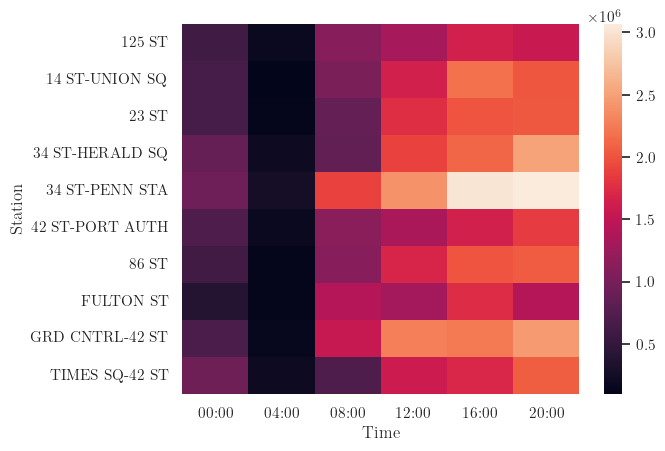

In [297]:
sns.heatmap(res_cross)
plt.savefig('TimeIntervals.png', dpi = 300, transparent = True)

In [302]:
#small_final_df_cross = pd.crosstab(index = small_final_df['Station'], columns=[small_final_df['Month'], small_final_df['Day']], values=small_final_df.Total, aggfunc='sum')
small_final_df_cross = pd.crosstab(index = small_final_df['Station'], columns=[small_final_df['Month']], values=small_final_df.Total, aggfunc='sum')

In [303]:
small_final_df_cross

Month,April,February,March,May
Station,,,,
125 ST,2082726.0,162072.0,2202383.0,1964214.0
14 ST-UNION SQ,2500252.0,180478.0,2588272.0,2338446.0
23 ST,2423685.0,177720.0,2542866.0,2274926.0
34 ST-HERALD SQ,2763581.0,211504.0,2823463.0,2655279.0
34 ST-PENN STA,3820138.0,265783.0,3987741.0,3493733.0
42 ST-PORT AUTH,2278012.0,162560.0,2326825.0,2066284.0
86 ST,2454926.0,178184.0,2630966.0,2321083.0
FULTON ST,2131417.0,148598.0,2200771.0,1909425.0
GRD CNTRL-42 ST,3099752.0,191492.0,3136438.0,2922493.0


<AxesSubplot: xlabel='Month', ylabel='Station'>

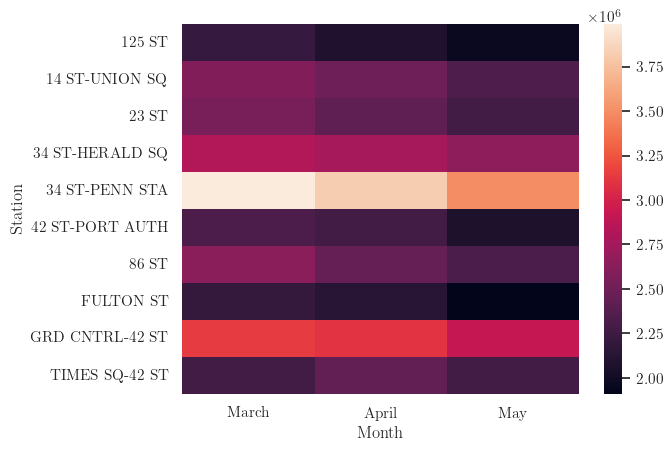

In [309]:
small_final_df_cross.reindex(['March', 'April', 'May'], axis="columns")

sns.heatmap(small_final_df_cross[['March','April', 'May']])

In [95]:
grouped = final_df.groupby(['Station']).aggregate(
    {'Total': ['mean', 'sum']})

    #'Entry': ['mean', 'sum'],

grouped.head(10)

Total           
                       mean        sum
Station                               
1 AV             165.078640  2145362.0
103 ST           298.957753  2448464.0
103 ST-CORONA    436.989360  2135567.0
104 ST            71.144101   310544.0
110 ST           316.838393  1033210.0
111 ST           169.493369  1444253.0
116 ST           208.265125  2485436.0
116 ST-COLUMBIA  255.961491   830851.0
121 ST            53.935018   179280.0
125 ST           281.065933  6411395.0

In [100]:
grouped.sort_values(by=('Total','sum'),ascending=False)

Total            
                       mean         sum
Station                                
34 ST-PENN STA   211.651602  11567395.0
GRD CNTRL-42 ST  183.765551   9350175.0
34 ST-HERALD SQ  295.361156   8453827.0
14 ST-UNION SQ   340.820214   7607448.0
86 ST            216.954379   7585159.0
...                     ...         ...
BEACH 98 ST       18.482682     49626.0
TOMPKINSVILLE      8.176925     26436.0
BEACH 105 ST       9.456506     25438.0
BROAD CHANNEL     10.547251     17076.0
ORCHARD BEACH      0.578571        81.0

[379 rows x 2 columns]

In [ ]:
top10_station =  grouped.sort_values(by=('Total','sum'),ascending=False)

In [101]:
grouped_time = final_df.groupby(['Station','Day','Time']).aggregate(
    {'Total': ['mean', 'sum']})



In [102]:
grouped_time.head(10)

Total         
                               mean      sum
Station Day    Time                         
1 AV    Friday 00:00:00  159.117424  42007.0
               03:00:00   49.791667   2390.0
               04:00:00   25.159091   6642.0
               07:00:00   39.854167   1913.0
               08:00:00  108.038610  27982.0
               11:00:00  296.770833  14245.0
               11:59:48  136.285714   1908.0
               12:00:00  241.094488  61238.0
               15:00:00  217.604167  10445.0
               16:00:00  255.977273  67578.0

In [103]:
#grouped_time.to_excel('sth.xlsx')

In [175]:
#Split time into categories and evaluate for TOP10 stations
#ti_1 = pd.Interval(pd.Timestamp('00:00:00'), pd.Timestamp('06:00:00') ) # 00:00 - 06:00 # Sleep Interval
#ti_2 = pd.Interval(pd.Timestamp('06:00:00'), pd.Timestamp('10:00:00') ) # 06:00 - 10:00 # Work!
#ti_3 = pd.Interval(pd.Timestamp('10:00:00'), pd.Timestamp('16:00:00') ) # 10:00 - 16:00 # 
#ti_4 = pd.Interval(pd.Timestamp('16:00:00'), pd.Timestamp('20:00:00') ) # 16:00 - 20:00 # Rush Hour
#ti_5 = pd.Interval(pd.Timestamp('20:00:00'), pd.Timestamp('00:00:00') ) # 20:00 - 00:00 #
#ti_6 = pd.Interval(pd.Timestamp('00:00:00'), pd.Timestamp('23:00:00') ) # 23:00 - 03:00

Interval('2022-12-26 03:00:00', '2022-12-26 07:00:00', closed='right')

In [122]:
crossed = pd.crosstab(final_df['Station'], final_df['Month'], values=final_df.Total, aggfunc='sum') #TimeInterval will be created in order to explore further

In [137]:
crossed2 = crossed.head(20)

<AxesSubplot: xlabel='Month', ylabel='Station'>

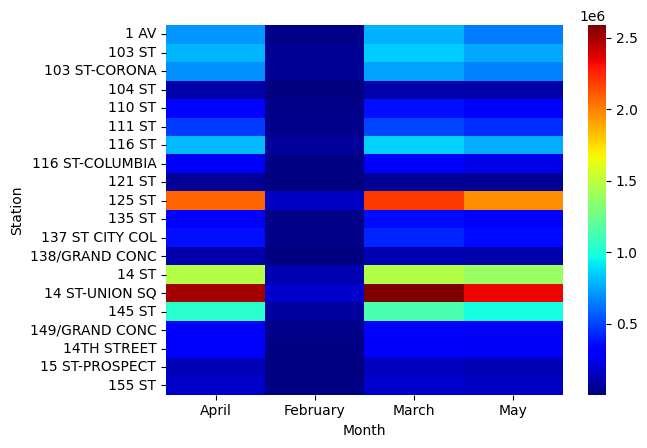

In [139]:
# Create Heatmaps wrt time-intervals, month for TOP 5(or top10), borough
#
#
sns.heatmap(crossed2, cmap="jet")

In [157]:
final_df['DateTime'] = pd.to_datetime(final_df.Date.astype(str) + ' ' + final_df.Time.astype(str))

#final_df["DateTime"] = pd.to_datetime(final_df["DateTime"], format='%Y-%m-%d %H:%M:%S')

C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\620760800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['DateTime'] = pd.to_datetime(final_df.Date.astype(str) + ' ' + final_df.Time.astype(str))


In [164]:
final_df.head(10)

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description,Borough,Total,DateTime
0,A002-R051-02-00-00,59 ST,2022-02-26,07:00:00,February,Saturday,4.0,21.0,REGULAR,Brooklyn,25.0,2022-02-26 07:00:00
1,A002-R051-02-00-00,59 ST,2022-02-26,11:00:00,February,Saturday,17.0,102.0,REGULAR,Brooklyn,119.0,2022-02-26 11:00:00
2,A002-R051-02-00-00,59 ST,2022-02-26,15:00:00,February,Saturday,33.0,85.0,REGULAR,Brooklyn,118.0,2022-02-26 15:00:00
3,A002-R051-02-00-00,59 ST,2022-02-26,19:00:00,February,Saturday,67.0,65.0,REGULAR,Brooklyn,132.0,2022-02-26 19:00:00
4,A002-R051-02-00-00,59 ST,2022-02-26,23:00:00,February,Saturday,32.0,38.0,REGULAR,Brooklyn,70.0,2022-02-26 23:00:00
5,A002-R051-02-00-00,59 ST,2022-02-27,03:00:00,February,Sunday,13.0,12.0,REGULAR,Brooklyn,25.0,2022-02-27 03:00:00
6,A002-R051-02-00-00,59 ST,2022-02-27,07:00:00,February,Sunday,5.0,3.0,REGULAR,Brooklyn,8.0,2022-02-27 07:00:00
7,A002-R051-02-00-00,59 ST,2022-02-27,11:00:00,February,Sunday,16.0,54.0,REGULAR,Brooklyn,70.0,2022-02-27 11:00:00
8,A002-R051-02-00-00,59 ST,2022-02-27,15:00:00,February,Sunday,46.0,55.0,REGULAR,Brooklyn,101.0,2022-02-27 15:00:00
9,A002-R051-02-00-00,59 ST,2022-02-27,19:00:00,February,Sunday,40.0,50.0,REGULAR,Brooklyn,90.0,2022-02-27 19:00:00


In [245]:
final_df_4h_resample = final_df.groupby('Station').resample("4H", on = 'DateTime').sum()

C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\1932760532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df_4h_resample = final_df.groupby('Station').resample("4H", on = 'DateTime').sum()
C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\1932760532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df_4h_resample = final_df.groupby('Station').resample("4H", on = 'DateTime').sum()
C:\Users\kemal\AppData\Local\Temp\ipykernel_26176\1932760532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

In [250]:
final_df_4h_resample.sort_values(by = final_df_4h_resample.columns[2], ascending=False)

Entry     Exit    Total
Station        DateTime                                      
34 ST-PENN STA 2022-03-10 16:00:00  14971.0  33928.0  48899.0
               2022-05-17 20:00:00  14680.0  33000.0  47680.0
               2022-04-07 20:00:00  14456.0  32715.0  47171.0
               2022-05-05 20:00:00  14404.0  32566.0  46970.0
               2022-05-24 20:00:00  14465.0  32250.0  46715.0
...                                     ...      ...      ...
GRAHAM AV      2022-04-30 16:00:00      0.0      0.0      0.0
               2022-04-30 12:00:00      0.0      0.0      0.0
CLARK ST       2022-04-01 08:00:00      0.0      0.0      0.0
ORCHARD BEACH  2022-05-23 20:00:00      0.0      0.0      0.0
183 ST         2022-03-09 12:00:00      0.0      0.0      0.0

[206031 rows x 3 columns]

In [267]:
#final_df_4h_resample['Time'] = final_df_4h_resample.index[1]

final_df_4h_resample.reset_index(inplace=True)

In [269]:
final_df_4h_resample['Time'] = final_df_4h_resample['DateTime'].dt.time

In [270]:
final_df_4h_resample

,Station,DateTime,Entry,Exit,Total,Time
0,1 AV,2022-02-26 04:00:00,5.0,39.0,44.0,04:00:00
1,1 AV,2022-02-26 08:00:00,17.0,29.0,46.0,08:00:00
2,1 AV,2022-02-26 12:00:00,10.0,21.0,31.0,12:00:00
3,1 AV,2022-02-26 16:00:00,3.0,3.0,6.0,16:00:00
4,1 AV,2022-02-26 20:00:00,1.0,0.0,1.0,20:00:00
...,...,...,...,...,...,...
206026,ZEREGA AV,2022-05-27 04:00:00,26.0,66.0,92.0,04:00:00
206027,ZEREGA AV,2022-05-27 08:00:00,545.0,308.0,853.0,08:00:00
206028,ZEREGA AV,2022-05-27 12:00:00,231.0,253.0,484.0,12:00:00
206029,ZEREGA AV,2022-05-27 16:00:00,304.0,583.0,887.0,16:00:00


In [160]:
final_df2 = final_df.resample('4H', on='DateTime')

In [174]:
final_df.head()

,Turnstile,Station,Date,Time,Month,Day,Entry,Exit,Description,Borough,Total,DateTime
0,A002-R051-02-00-00,59 ST,2022-02-26,07:00:00,February,Saturday,4.0,21.0,REGULAR,Brooklyn,25.0,2022-02-26 07:00:00
1,A002-R051-02-00-00,59 ST,2022-02-26,11:00:00,February,Saturday,17.0,102.0,REGULAR,Brooklyn,119.0,2022-02-26 11:00:00
2,A002-R051-02-00-00,59 ST,2022-02-26,15:00:00,February,Saturday,33.0,85.0,REGULAR,Brooklyn,118.0,2022-02-26 15:00:00
3,A002-R051-02-00-00,59 ST,2022-02-26,19:00:00,February,Saturday,67.0,65.0,REGULAR,Brooklyn,132.0,2022-02-26 19:00:00
4,A002-R051-02-00-00,59 ST,2022-02-26,23:00:00,February,Saturday,32.0,38.0,REGULAR,Brooklyn,70.0,2022-02-26 23:00:00


In [173]:
final_df2.first(10)

,Entry,Exit,Total
DateTime,,,
2022-02-26 04:00:00,6.0,14.0,20.0
2022-02-26 08:00:00,2.0,31.0,33.0
2022-02-26 12:00:00,19.0,192.0,211.0
2022-02-26 16:00:00,41.0,352.0,393.0
2022-02-26 20:00:00,47.0,306.0,353.0
...,...,...,...
2022-05-27 04:00:00,2.0,4.0,6.0
2022-05-27 08:00:00,11.0,83.0,94.0
2022-05-27 12:00:00,35.0,180.0,215.0
